**독립적, 즉 naive한 관계**를 가정하고 적용
> 확률에 대한 관점은 빈도주의자와 베이지안으로 구분하여 볼 수 있다.
- 빈도 주의자: 확률이란 오랫동안 반복하며 기대하는 빈도
    - 무작위로 충분히 샘플링 을 하여 발생한 과거의 데이터로 계산한다
    - 빈도 주의자는 가설을 설정하고, 실험을 하고, 결과를 통해 가설이 맞는지 통계적 추정을 할 경우, 그 값이 정해져 있다고 본다
    - 모집단이 정규분포를 따른다고 하면, 평균은 어떤 확률로 신뢰구간 내에 반드시 그 값이 존재한다.
- 베이지안: 확률이란 불확실한 사건에 대한 주관이나 자신이 믿고 있는 정도에 따라 확률이 정해진다.
    - 사전확률 prior을 정하고
    - 주어지는 증거에 따라 갱신 likelihood
    - 사후 확률 posterior 추정
        - 평균값을 추정할 경우, 그값은 불확실하며 분포에 따라 신뢰구간 내에 존재할 수도 있고 없을 수도 있다

베이지안에서는 어떤 가설을 평가하기 위해, 먼저 (1) 사전확률 $P(\theta)$을 예상하고, 여기에 관측된 데이터로부터 계산된 (2) 가능성 likelihood $P(D|\theta)$을 곱하고, (3) P(D)로 나누어, 사후확률을 계산하여 추론하게 된다.

$P(\theta|D) = \frac{P(D|\theta) P(\theta)}{P(D)}$

P(D)는 사후확률을 확률분포로 만들게 하는 정규화 상수이다. 즉 P(D)로 나누어주면 사후확률분포의 합이 1이 되게 한다. 추론을 할 때는 최대값을 구하기만 하면 되므로, 위 식에서 분모 P(D)를 생략하면 아래와 같다. 좌측 사후확률이 우측 계산식과 동일하지 않기 때문에, 비례관계에 있다고 (propotional to) 한다.

$P(\theta|D) \propto P(D|\theta) \cdot P(\theta)$

즉 사후확률은 ∝ 가능도 × 사전확률로 계산할 수 있다.

또는, 로그를 취해서, $log P(D | \theta) + log P(\theta)$을 사용해서 추론할 수 있다.

In [1]:
import numpy as np
_x = np.array([
        ('m', 'b', 1),
        ('m', 's', 1),
        ('g', 'q', 1),
        ('h', 's', 1),
        ('g', 'q', 1),
        ('g', 'q', 0),
        ('g', 's', 0),
        ('h', 'b', 0),
        ('h', 'q', 0),
        ('m', 'b', 0)],
        dtype=[('A', 'U1'), ('B', 'U1'), ('C', 'i1')
])
#속성은 A,B,C
#'U'유니코드 문자열, 'i'는 정수의미 뒤 숫자는 8비트 정수 의미
#뒤 숫자는 자릿수의미

In [5]:
_x['A']

array(['m', 'm', 'g', 'h', 'g', 'g', 'g', 'h', 'h', 'm'], dtype='<U1')

In [10]:
#'B' 열 읽기
_x['B'][1:5]

array(['b', 's', 'q', 's', 'q', 'q', 's', 'b', 'q', 'b'], dtype='<U1')

In [9]:
#조건에 맞는 행 읽기
_x[_x['A']=='m']

array([('m', 'b', 1), ('m', 's', 1), ('m', 'b', 0)],
      dtype=[('A', '<U1'), ('B', '<U1'), ('C', 'i1')])

In [11]:
#특정 컬럼에 대해 조건에 맞는 경우만 읽기
_x['A'][_x['C']==1]

array(['m', 'm', 'g', 'h', 'g'], dtype='<U1')

In [12]:
#np.count_nonzero() 함수: 조건에 맞는 개수를 계산
#C가 1일 경우 A가 'm'일 때
np.count_nonzero(_x['A'][_x['C']==1] == 'm')

2

### 1) 사후확률 post_c1 (c=1)
A=m이고 B=q일 경우, Pr(C=1)를 구하기
##### 1-1) 사전확률 Pr(c = 1)
##### 1-2) 가능도 Pr(A = m | c = 1) => 2/5
##### 1-3) 가능도 Pr(B = q | c = 1) => 2/5
##### 1-4) 사후확률 post_c1(c = 1) => 0.08  (2/25=5/10 2/5)

In [13]:
#키를 세어서 defaultdict(int)로 사전확률 저장
#비어있는 dict에 int 형으로 저장 defaultdict(int)
import collections

prior_kc=collections.defaultdict(int) #초기화
for item in _x['C']:
    prior_kc[item]+=1 # ok to add (key, value) to defaultdict. NOT ok if not defaultdict

In [15]:
print ('prior key counts computed: {}'.format(prior_kc))

prior key counts computed: defaultdict(<class 'int'>, {1: 5, 0: 5})


In [16]:
prior_kc.values()

dict_values([5, 5])

In [17]:
#확률 계산
allFreq=sum(prior_kc.values())
prior_c=dict()
for k,v in prior_kc.items():
    prior_c[k]=float(v)/allFreq

print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


In [20]:
# 1-2
## c=1인 경우, A=m 인 likelihood 계산
aLikelihood_c1=_x['A'][_x['C']==1] #C=1일때 A
aLikelihood_c1

array(['m', 'm', 'g', 'h', 'g'], dtype='<U1')

In [19]:
kc_a_c1=collections.defaultdict(int) ##초기화

for item in aLikelihood_c1:
    kc_a_c1[item]+=1
print ('kc_a_c1 key counts computed: {}',format(kc_a_c1))

array(['m', 'm', 'g', 'h', 'g'], dtype='<U1')

In [21]:
#확률적으로 계산
allFreq=len(aLikelihood_c1)
prob_a_c1=dict()
for k,v in kc_a_c1.items():
    prob_a_c1[k]=float(v)/allFreq
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


In [24]:
# 1-3
bLikelihood_c1=_x['B'][_x['C']==1] #C=1일때 B계산
bLikelihood_c1

array(['b', 's', 'q', 's', 'q'], dtype='<U1')

In [25]:
kc_b_c1=collections.defaultdict(int)
for item in bLikelihood_c1:
    kc_b_c1[item]+=1
print ('kc_b_c1 key counts computed: {}',format(kc_b_c1))

kc_b_c1 key counts computed: {} defaultdict(<class 'int'>, {'b': 1, 's': 2, 'q': 2})


In [26]:
#확률적으로 계산
allFreq=len(bLikelihood_c1)
prob_b_c1=dict()
for k,v in kc_b_c1.items():
    prob_b_c1[k]=float(v)/allFreq
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [27]:
# 1-4) 사후 확률은 앞서 계산한 사전확률 및 우도를 곱해서 계산한다
# - 사전확률: prior_c : {1:0.5, 0:0.5}
# - A의 우도  prior_a_c1: {'m': 0.4, 'g': 0.4, 'h':0.2}
# - B의 우도  prior_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}

In [29]:
print ("prior_c: {}".format(prior_c))
print ("prob_a_c1: {}".format(prob_a_c1))
print ("prob_b_c1: {}".format(prob_b_c1))

prior_c: {1: 0.5, 0: 0.5}
prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}
prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [30]:
##사전확률 1 * A의 우도 m * B의 우도 q
post_c1= prior_c[1] * prob_a_c1['m'] * prob_b_c1['q']
print ("posterior computed if c==1: {:.3f}".format(post_c1))

posterior computed if c==1: 0.080


### 1) 사후확률 post_c0 (c=0)
A=m이고 B=q일 경우, Pr(C=0)를 구하기
##### 1-1) 사전확률 Pr(c = 0)
##### 1-2) 가능도 Pr(A = m | c = 0) => 2/5
##### 1-3) 가능도 Pr(B = q | c = 0) => 2/5
##### 1-4) 사후확률 post_c1(c = 0) => 0.08  (2/25=5/10 2/5)

In [31]:
#사전확률 Pr(c=0)
## np.count_nonzero() 함수의 조건에 맞는 요소의 개수를 계산
np.count_nonzero(_x['C']==0)

5

In [32]:
_x['C']

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int8)

In [34]:
prior_c0 = np.count_nonzero(_x['C']==0)/_x.shape[0]
prior_c0

0.5

In [35]:
prob_am_c0=np.count_nonzero(_x['A'][_x['C']==0] == 'm')/np.count_nonzero(_x['C']==0)

In [36]:
prob_bq_c0=np.count_nonzero(_x['B'][_x['C']==0] == 'q')/np.count_nonzero(_x['C']==0)

In [37]:
post_c0 = prior_c0 * prob_am_c0 * prob_bq_c0
f"post_cf:{post_c0:.3f}"

'post_cf:0.040'

#### lambda 함수 이용
- set 함수 이용 : 중복 없이 저장한다는 특성을 이용하여 키를 구한다.

In [38]:
c=_x['C'].tolist()
for i in set(c):
    print("prior_{}: {}".format(i, c.count(i)/float(len(c))))

prior_0: 0.5
prior_1: 0.5


In [39]:
# ref: DecisionTree.getProb()
getProb=lambda x: dict((i,x.count(i)/float(len(x))) for i in set(x))
print ("prior: {}".format(getProb(c)))

prior: {0: 0.5, 1: 0.5}


In [40]:
# Pr(A=m | c=0) -> 1/5
a=_x[_x['C']==0]['A'].tolist()
prob_a_c0=getProb(a)
print ("prob_b_c0: {}".format(prob_a_c0))

prob_b_c0: {'g': 0.4, 'h': 0.4, 'm': 0.2}


In [41]:
# Pr(B=q | c=0) -> 2/5
b=_x[_x['C']==0]['B'].tolist()
prob_b_c0=getProb(b)
print ("prob_b_c0: {}".format(prob_b_c0))

prob_b_c0: {'q': 0.4, 'b': 0.4, 's': 0.2}


#### 의사결정

In [43]:
#argmax()는 큰 값의 인덱스를 출력
#post_ct = 0.08, post_cf=0.04이므로 첫번째 인덱스인 0이 출력
np.array([post_c1,post_c0]).argmax()

0

## 이항 베이지안
베이지안 확률에 따르면: $p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}$

$\theta$는 가설로서, 어떤 확률이 된다. D는 증거 또는 데이터를 말한다.

- 사전확률 $p(\theta)$이란 증거 D를 감안하지 않고 사전에 $\theta$에 대한 믿음의 강도을 말한다.
- 사후확률 $p(\theta|D)$ 증거 D를 고려하고 가지게 되는 믿음의 강도. 예를 들어, 동전을 10번 던져서 5회 나왔다는 것을 보고 나서, 확률이 $\theta$라고 믿게 되는 확률을 말한다.
- 가능도 $p(D|\theta)$란 동전이 $\theta$의 확률일 경우, 예를 들어, 10회 던져서 몇 번이나 앞, 뒤면이 나오는지를 말한다.<br>

정규분포와 이항분포의 분포를 displot() 그래프로 그려보자. binomial()은 n시도에서, p=성공확률로 무작위 수를 생성한다. normal()은 loc 평균, scale 분산으로 무작위 수를 생성한다.

C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprec

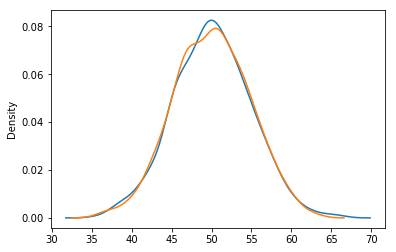

In [68]:
##정규분포랑 이항 분포를 그래프로 그려서 차이 확인
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

#loc= 평균, scale = 표준편차
sns.kdeplot(random.normal(loc=50, scale=5, size=1000), label='normal')
sns.kdeplot(random.binomial(100, p=0.5, size=1000), label='binomial')
plt.show()

In [70]:
#사전확률

## p(세타) -> 이항분포일때는 beta 분포를 따름

import numpy as np
#알파 1 베타 1, 100회 무작위 샘플
np.random.beta(1,1,100).mean() # -> 0.5

0.47732058414831097

C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


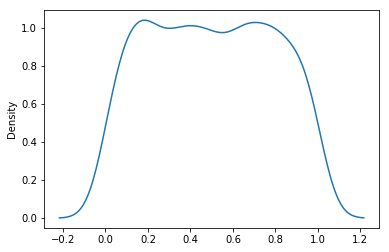

In [71]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='binomial')
plt.show()

#균등분포와 비슷한 모양을 하고 있음

In [48]:
## 가능도

# 6회에서 앞 면이 0,1,2,3,4,5,6 나올 확률. 
# 단 동전이 biased되어서 앞면 확률은 0.3.-> 0.5
# 확률을 구해보면:
from scipy import special
n=6
k=0
p=0.5
# comb(6,0)는 exact연산.
print (special.comb(6, k, exact=True)*(p**k)*( (1-p)**(n-k) ) )

0.015625


In [49]:
for i in range(7):
    print ("Pr(X = {} heads)= {:.5f}".format(i, special.comb(6, i, exact=True)*(p**i)*( (1-p)**(n-i) ) ) )

Pr(X = 0 heads)= 0.01562
Pr(X = 1 heads)= 0.09375
Pr(X = 2 heads)= 0.23438
Pr(X = 3 heads)= 0.31250
Pr(X = 4 heads)= 0.23438
Pr(X = 5 heads)= 0.09375
Pr(X = 6 heads)= 0.01562


In [50]:
import scipy.stats as stats
for i in range(7):
    print ("{:.5f}".format(stats.binom.pmf(i,6,0.5)))

0.01563
0.09375
0.23438
0.31250
0.23438
0.09375
0.01563


C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprec

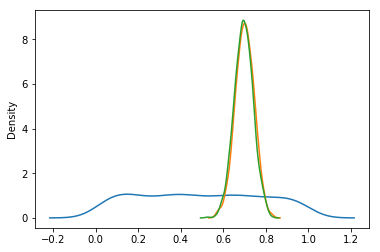

In [51]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='beta') #prior a=1, b=1
sns.kdeplot(random.beta(a=70, b=30, size=1000), label='beta') #likelihood a=70, b=100-70 (n=100, k=30)
sns.kdeplot(random.beta(a=71, b=31, size=1000), label='beta') #posterior a=70+1, b=100-70+1
plt.show()

In [52]:
import math

a=71 #posterior a=70+1, b=100-70+1 (n=100, k=30)
b=31
mu=a/(a+b)
std=math.sqrt(a*b/(math.pow(a+b,2)*(a+b+1)))
f"mean: {mu:.3f} std:{std:.3f}"

'mean: 0.696 std:0.045'

## Sklearn

In [53]:
import numpy as np

city_list = ["Seoul", "Jongro", "Sydney", "Gangnam", "NY"]
feature1 = [1, 0, 0, 0, 0]
feature2 = [0, 1, 0, 1, 0]
feature3 = [0, 0, 1, 0, 0]
feature4 = [0, 0, 0, 1, 0]
feature5 = [0, 0, 1, 0, 1]
feature6 = [1, 1, 0, 0, 0]
labels = [1, 1, 0, 1, 0, 1]

In [54]:
trainData = np.array([feature1, feature2, feature3, feature4, feature5, feature6])

In [55]:
trainData.shape

(6, 5)

In [72]:
trainData

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0]])

In [73]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB() #이항분포 모델

In [74]:
clf.fit(trainData, labels) #train시킴

BernoulliNB()

In [75]:
clf.predict(trainData) #trainData의 predict

array([1, 1, 0, 1, 0, 1])

In [59]:
testData=np.array([[0, 0, 1, 1, 1], [1, 0, 0, 1, 0], [1, 1, 1, 1, 0]])

In [60]:
clf.predict(testData)

array([0, 1, 1])

In [61]:
#정확도 측정
clf.score(trainData,labels)

1.0

In [62]:
clf.score(testData, [0, 1, 1])

1.0

In [76]:
#각 확률 0일 확률, 1일 확률
clf.predict_proba(trainData)

array([[0.09194098, 0.90805902],
       [0.03264813, 0.96735187],
       [0.8200225 , 0.1799775 ],
       [0.09194098, 0.90805902],
       [0.95795007, 0.04204993],
       [0.03264813, 0.96735187]])

In [77]:
pr=clf.predict_proba(trainData)

In [78]:
pr.shape, testData.shape

((6, 2), (3, 5))

In [79]:
pr

array([[0.09194098, 0.90805902],
       [0.03264813, 0.96735187],
       [0.8200225 , 0.1799775 ],
       [0.09194098, 0.90805902],
       [0.95795007, 0.04204993],
       [0.03264813, 0.96735187]])

## 정규분포 베이지안